# Markov chain Monte Carlo (MCMC) from Scratch

This notebook implements 2 common MCMC algorithms, Gibbs sampling and Metropolis-Hastings, from scratch to deepen my understanding of them.  
This notebook is based on http://www.stat.columbia.edu/~gelman/book/.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gibbs Sampling

This is based on the example in section 11.1.  
We want to sample from the bivariate normal distribution
$$\left. 
\begin{pmatrix}
\theta_{1} \\
\theta_{2}
\end{pmatrix} \hspace{0.1cm} \middle|  \hspace{0.1cm} y \sim 
N\left(\begin{pmatrix}
y_{1} \\
y_{2}
\end{pmatrix}, 
\begin{pmatrix}
1 & \rho \\
\rho & 1
\end{pmatrix}\right)
\right.
$$
by alternately sampling from 2 univariate normal distribution
$$\theta_{1} \mid \theta_{2}, y \hspace{0.3cm} \sim \hspace{0.3cm} N\left(y_1 + \rho(\theta_2 - y_2), 1-\rho^2\right)$$
  
$$\theta_{2} \mid \theta_{1}, y \hspace{0.3cm} \sim \hspace{0.3cm} N\left(y_2 + \rho(\theta_1 - y_1), 1-\rho^2\right)$$

### Ground Truth

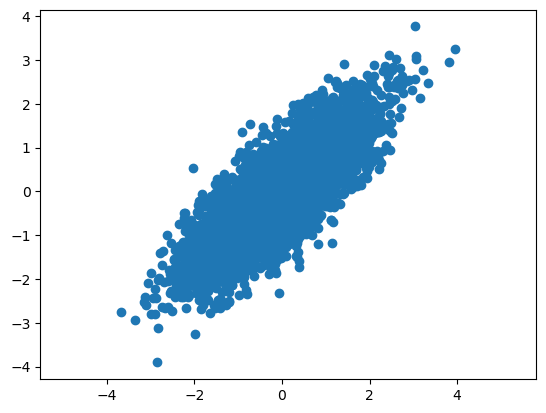

In [2]:
np.random.seed(123)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
theta1_true, theta2_true = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(theta1_true, theta2_true, 'o')
plt.axis('equal')
plt.show()

### Implementation

In [3]:
def Gibbs_bivariate_normal(theta1_start, theta2_start, 
                           y1, y2, rho, n_iter = 5000):
    theta1 = [theta1_start]
    theta2 = [theta2_start]
    for _ in range(n_iter):
        theta1.append(np.random.normal(y1 + rho * (theta2[-1] - y2), 1 - rho**2))
        theta2.append(np.random.normal(y2 + rho * (theta1[-1] - y1), 1 - rho**2))
    return theta1[1:], theta2[1:]

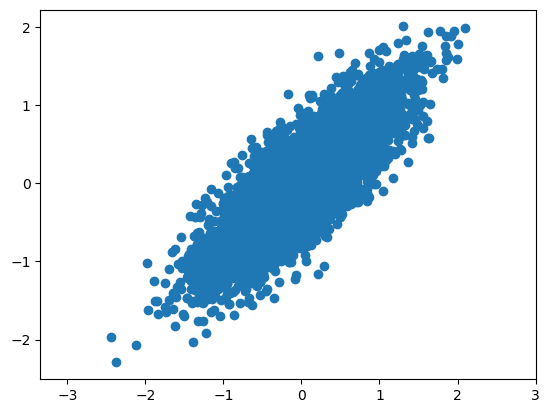

In [4]:
np.random.seed(123)
theta1, theta2 = Gibbs_bivariate_normal(theta1_start = -2.5, theta2_start = 2.5, 
                                        y1 = 0, y2 = 0, rho = 0.8)
plt.plot(theta1, theta2, 'o')
plt.axis('equal')
plt.show()

The plot is indeed similar to the ground truth.

## Metropolis-Hastings

This algorithm let us sample from an unknown distribution $p(\theta)$ satisfying
$$p(\theta) \propto f(\theta), \hspace{0.2cm} \text{for known } f(\theta)$$
In other words, 
$$p(\theta) = \frac{f(\theta)}{\text{Normalizing Constant}}$$
  
and this algorithm enables us to sample from $p(\theta)$ without computing the normalizing constant, which is often unpleasant.

In [5]:
def Metropolis_Hastings(theta_0, f, J, burn_in = 1000, n_iter = 10000):
    theta = [theta_0]
    for _ in range(n_iter):
        proposal = J(theta[-1])
        r = (f(proposal)/J(proposal))/(f(theta[-1])/J(theta[-1]))
        if np.random.uniform() <= min(r, 1):
            theta.append(proposal)
        else:
            theta.append(theta[-1])
    return theta[burn_in + 1:]

Let's test the implementation by sampling from a standard normal distribution.  
In this case, 
$$f(\theta) = \exp(-\frac{1}{2}\theta^2)$$
Let's using a normal jumping kernel but shrinked by 1/2,
$$J_t(\theta^*\mid\theta^{t-1}) = N(\theta^*\mid\theta^{t-1}, 0.5^2)$$
Note: In this case, the jumping kernel is symmetric so the algorithm reduces to the Metropolis algorithm as described in section 11.2.

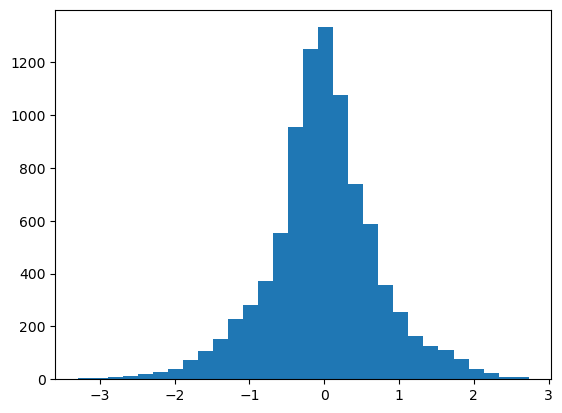

In [6]:
np.random.seed(123)
theta = Metropolis_Hastings(np.random.uniform(), # use Unif(0,1) as the starting distribution
                            lambda x: np.exp(-0.5*x**2), 
                            lambda x: np.random.normal(x, 0.5**2))

plt.hist(theta, bins = 30)
plt.show()

The plot is indeed similar to the normal distribution.